In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/onlinefoods.csv")
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
columns = df[
    ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
     'Educational Qualifications', 'Family size',
      'Output', 'Feedback', 'Unnamed: 12']
]

columns

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,Yes,Positive,Yes


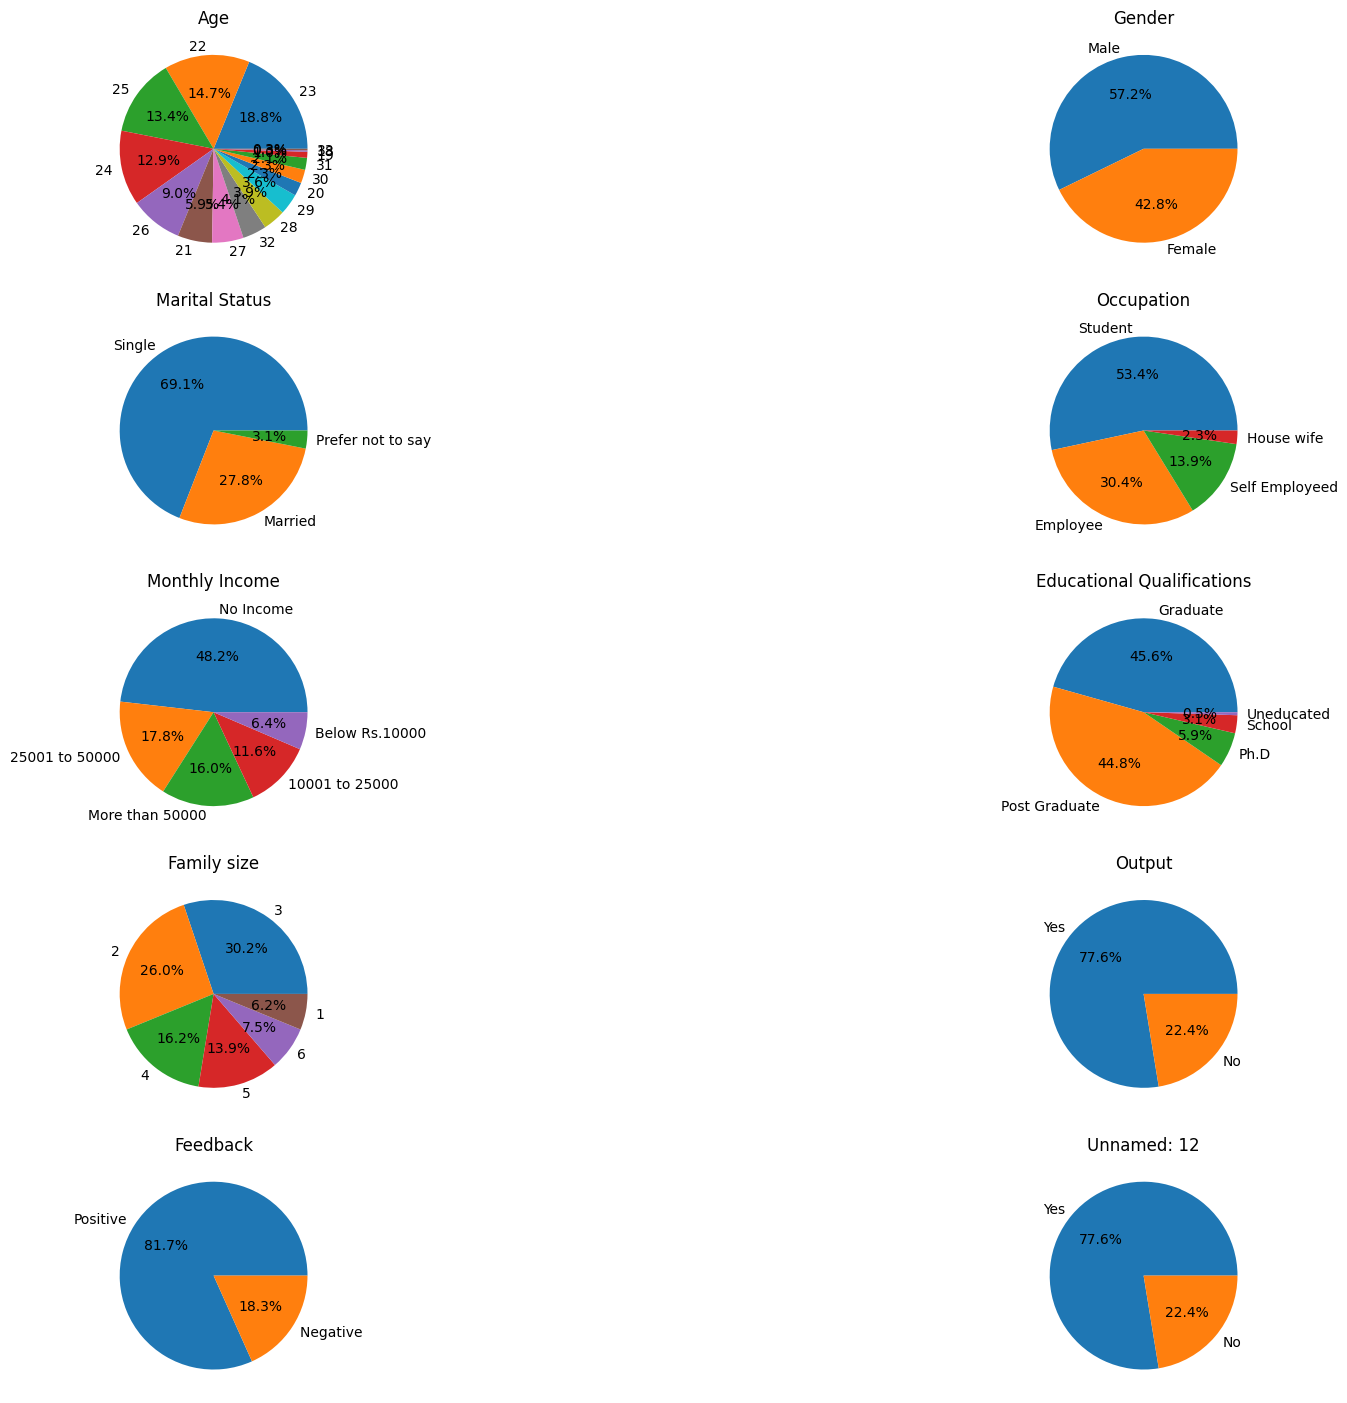

In [5]:
plt.figure(figsize=(22, 25))
for i, col in enumerate(columns):
    plt.subplot(7, 2, i+1)
    counts = df[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(col)

plt.show()

In [6]:
df.drop(columns=['latitude', 'longitude', 'Unnamed: 12'], inplace=True)
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,560010,Yes,Positive


In [7]:
print(df['Monthly Income'].unique())
print(df['Gender'].unique())
print(df['Marital Status'].unique())
print(df['Educational Qualifications'].unique())
print(df['Output'].unique())
print(df['Feedback'].unique())
print(df['Occupation'].unique())

['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
['Female' 'Male']
['Single' 'Married' 'Prefer not to say']
['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
['Yes' 'No']
['Positive' 'Negative ']
['Student' 'Employee' 'Self Employeed' 'House wife']


In [8]:
# Transforming Monthly Income Column
monthly_income = df['Monthly Income'].map({'No Income': 1, 'Below Rs.10000': 2, 'More than 50000': 3, '10001 to 25000': 4, '25001 to 50000': 5})
gender = df['Gender'].map({'Male': 1, 'Female': 2})
marial_status = df['Marital Status'].map({'Single': 1, 'Married': 2, 'Prefer not to say': 0})
education = df['Educational Qualifications'].map({'Uneducated': 0, 'School': 1, 'Graduate': 2, 'Post Graduate': 3, 'Ph.D': 4})
output = df['Output'].map({'Yes': 1, 'No': 0})
feedback = df['Feedback'].map({'Positive': 1, 'Negative ': 0})
occupation = df['Occupation'].map({'Student': 1, 'House wife': 2, 'Self Employeed': 3, 'Employee': 4})


In [9]:
print(monthly_income.unique())
print(gender.unique())
print(marial_status.unique())
print(education.unique())
print(output.unique())
print(feedback.unique())
print(occupation.unique())

[1 2 3 4 5]
[2 1]
[1 2 0]
[3 2 4 0 1]
[1 0]
[1 0]
[1 4 3 2]


In [10]:
df['Monthly Income'] = monthly_income
df['Gender'] = gender
df['Marital Status'] = marial_status
df['Educational Qualifications'] = education
df['Output'] = output
df['Feedback'] = feedback
df['Occupation'] = occupation

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         388 non-null    int64
 1   Gender                      388 non-null    int64
 2   Marital Status              388 non-null    int64
 3   Occupation                  388 non-null    int64
 4   Monthly Income              388 non-null    int64
 5   Educational Qualifications  388 non-null    int64
 6   Family size                 388 non-null    int64
 7   Pin code                    388 non-null    int64
 8   Output                      388 non-null    int64
 9   Feedback                    388 non-null    int64
dtypes: int64(10)
memory usage: 30.4 KB


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X=df[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Feedback'
      ]]
y = df['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9102564102564102

In [13]:
# saving mapped csv
# df.to_csv('./data/onlinefoods_mapped_copy.csv')

In [14]:
df.corr()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
Age,1.000000,-0.062038,0.528712,0.594569,0.455938,-0.100036,0.169982,0.137294,-0.248052,-0.198170
Gender,-0.062038,1.000000,0.030622,-0.051835,-0.021662,0.074613,0.082488,-0.035685,-0.034701,0.045486
Marital Status,0.528712,0.030622,1.000000,0.436261,0.347696,-0.156099,0.234065,0.075926,-0.179587,-0.112861
Occupation,0.594569,-0.051835,0.436261,1.000000,0.823446,-0.130440,0.054422,0.163112,-0.283958,-0.224909
Monthly Income,0.455938,-0.021662,0.347696,0.823446,1.000000,-0.106504,0.020112,0.131021,-0.247437,-0.195761
Educational Qualifications,-0.100036,0.074613,-0.156099,-0.130440,-0.106504,1.000000,-0.051527,-0.056081,0.079595,0.121088
Family size,0.169982,0.082488,0.234065,0.054422,0.020112,-0.051527,1.000000,-0.009402,-0.043780,-0.010148
Pin code,0.137294,-0.035685,0.075926,0.163112,0.131021,-0.056081,-0.009402,1.000000,-0.019929,-0.003603
Output,-0.248052,-0.034701,-0.179587,-0.283958,-0.247437,0.079595,-0.043780,-0.019929,1.000000,0.592609
Feedback,-0.198170,0.045486,-0.112861,-0.224909,-0.195761,0.121088,-0.010148,-0.003603,0.592609,1.000000
